In [90]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt

In [2]:
### Ranking 1 : The Most Funded
funding = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_1.xlsx', header = 0)
### Ranking 2 : The most visited (alexaRank)
alexaRank = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_2.xlsx', header = 0)
### Ranking 3 : The most popular (twitter followers)
twitterFollowers = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_3.xlsx', header = 0)
### Ranking 4 : The Most Authoritative
domainAuthority = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_4.xlsx', header = 0)
### Ranking 5 : The most liked (on facebook)
facebookLikes = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_5.xlsx', header = 0)
### Ranking 6 : The Most Upvoted
huntVotes = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_6.xlsx', header = 0)
### Ranking 7 : The Fastest Growing
growthScore = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_7.xlsx', header = 0)
### Ranking 8 : The Most Prolific (number of statuses posted on company Twitter account)
tweetCount = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_8.xlsx', header = 0)
### Ranking 9 : The Most Influential (LinkedIn followers)
linkedinFollowers = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_9.xlsx', header = 0)
### Ranking 10 : The Most populous
employeesCount = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_10.xlsx', header = 0)
### Ranking 11 : The Most Cashed Out
exitValue = pd.read_excel('C:/Users/moham/OneDrive/Bureau/Cours/M2 IMSD/Python/Projet/project_python_imsd-master/ranking_11.xlsx', header = 0)

In [3]:
funding.head()

,noms,batch,categories,descriptions,variable
0,Airbnb,W09,Consumer,Book accommodations around the world,"$6,000.3m"
1,Cruise,W14,Transport,Self-driving cars.,"$3,368.8m"
2,Instacart,S12,Consumer,Groceries delivered fast.,"$2,095.9m"
3,Dropbox,S07,Other SaaS,Backup and share files in the cloud.,"$2,057.2m"
4,DoorDash,S13,Consumer,Restaurant delivery.,"$2,000.0m"


In [4]:
funding.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 5 columns):
noms            100 non-null object
batch           100 non-null object
categories      100 non-null object
descriptions    100 non-null object
variable        100 non-null object
dtypes: object(5)
memory usage: 4.7+ KB


In [5]:
### Create a list with all the ranking datasets
rankings = [funding, alexaRank, twitterFollowers, domainAuthority, facebookLikes, huntVotes, growthScore, tweetCount, linkedinFollowers, employeesCount, exitValue]

In [6]:
### On va travailler à la fois sur chaque dataframe séparément (pour avoir l'info du classement, combiner les dataframe
### deux à deux etc.) mais aussi sur l'ensemble. Je fusionne l'ensemble plus tard.

In [7]:
### Supprimer les $ et les m :
for dataset in [funding, exitValue]:
    dataset['variable'] = dataset['variable'].str[1:-1]

In [8]:
# Créer une fonction pour obtenir le nom du dataframe
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [9]:
# Enlever les virgules des milliers pour les colonnes qui en ont, et 
for dataset in rankings:
    if (dataset['variable'].dtype != 'int64') & (dataset['variable'].dtype != 'float64'):
        for count, value in enumerate(dataset['variable']):
            dataset.replace(dataset['variable'][count], value.replace(',', ''), inplace=True)
    else:
        print('La variable du dataframe ' + get_df_name(dataset) + ' est déjà sous une forme adaptée.')

La variable du dataframe domainAuthority est déjà sous une forme adaptée.


In [10]:
# Passer la variable d'intérêt d'objet à float.
for dataset in rankings:
    if (dataset['variable'].dtype != 'int64') & (dataset['variable'].dtype != 'float64'):
        for value in dataset['variable']:
            dataset = dataset.astype({'variable': 'float64'})

In [11]:
# Changer le nom de la variable d'intérêt de chaque dataframe.
for dataset in rankings:
    dataset.rename(columns={'variable': get_df_name(dataset)}, inplace=True)

In [13]:
# Combiner les dataframe en un gros réunissant tout
mergedRankings = reduce(lambda  left,right: pd.merge(left,right,on=['noms', 'batch', 'categories', 'descriptions'],
                                            how='outer'), rankings)

In [14]:
mergedRankings.head()

,noms,batch,categories,descriptions,funding,alexaRank,twitterFollowers,domainAuthority,facebookLikes,huntVotes,growthScore,tweetCount,linkedinFollowers,employeesCount,exitValue
0,Airbnb,W09,Consumer,Book accommodations around the world,6000.3,234,695116,91.0,8754088,NaN,600,39485,NaN,6100,NaN
1,Cruise,W14,Transport,Self-driving cars.,3368.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1770,1000.0
2,Instacart,S12,Consumer,Groceries delivered fast.,2095.9,4536,31175,71.0,84839,NaN,NaN,40930,NaN,800,NaN
3,Dropbox,S07,Other SaaS,Backup and share files in the cloud.,2057.2,79,4371622,95.0,1351489,NaN,NaN,NaN,NaN,3740,NaN
4,DoorDash,S13,Consumer,Restaurant delivery.,2000.0,1649,117922,73.0,54532,NaN,930,NaN,NaN,1700,NaN


In [15]:
### Plein de NaN values. Il semblerait qu'on ait pas toujours les 100 mêmes entreprises... 
### Ou alors, problème lors du merge qui a mis plusieurs lignes pour la même entreprise car parfois pas exactement le même nom pour la même startup ?

In [16]:
mergedRankings.nunique() ### On voit bien qu'il y a 499 noms différents. A voir si on a pas trop de trous pour faire des analyses.

noms                 499
batch                 28
categories            15
descriptions         499
funding               94
alexaRank            100
twitterFollowers     100
domainAuthority       32
facebookLikes        100
huntVotes             93
growthScore           84
tweetCount           100
linkedinFollowers     88
employeesCount        56
exitValue             38
dtype: int64

In [117]:
mergedRankings = mergedRankings.astype({'funding': 'float64', 'exitValue': 'float64', 'alexaRank': 'float64', 'twitterFollowers': 'float64', 'domainAuthority': 'float64', 'facebookLikes': 'float64', 'huntVotes': 'float64', 'growthScore': 'float64', 'tweetCount': 'float64', 'linkedinFollowers': 'float64', 'employeesCount': 'float64'})

### Exploration des différentes combinaisons

###### Funding x autres

In [120]:
fundTwitter = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'funding', 'twitterFollowers']]

In [121]:
fundTwitter = fundTwitter.dropna() ### 35 en commun

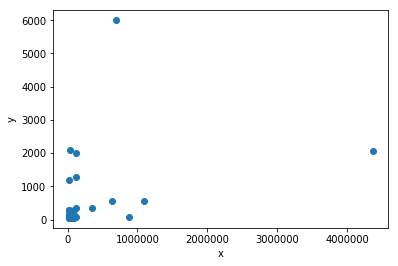

In [122]:
plt.scatter(fundTwitter['twitterFollowers'], fundTwitter['funding'])
#plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [123]:
fundFacebook = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'funding', 'facebookLikes']]

In [124]:
fundFacebook = fundFacebook.dropna() ### 25 en commun

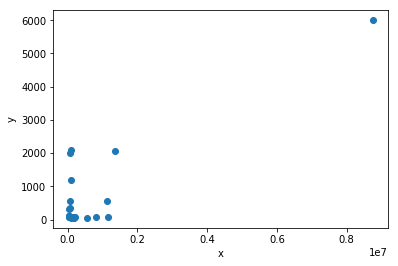

In [125]:
plt.scatter(fundFacebook['facebookLikes'], fundFacebook['funding'])
#plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [126]:
fundLinkedin = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'funding', 'linkedinFollowers']]

In [127]:
fundLinkedin = fundLinkedin.dropna() ### 24 en commun

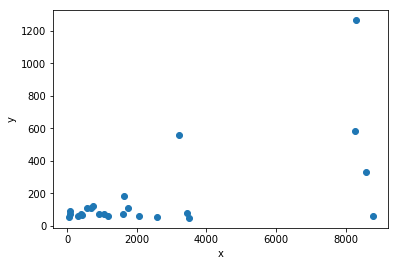

In [128]:
plt.scatter(fundLinkedin['linkedinFollowers'], fundLinkedin['funding'])
#plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [129]:
fundTweets = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'funding', 'tweetCount']]

In [130]:
fundTweets = fundTweets.dropna() ### 32 en commun

In [131]:
len(fundTweets)

32

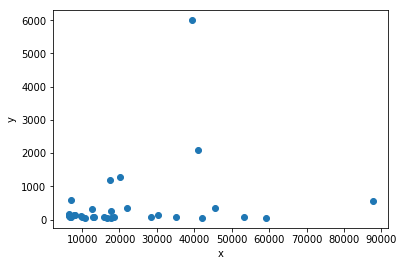

In [132]:
plt.scatter(fundTweets['tweetCount'], fundTweets['funding'])
#plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [133]:
## Moyen de regarder les trucs en commun avec une meilleure commande. Voir...

In [134]:
### Croisement des 4
fundSocialNet = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'funding', 'twitterFollowers', 'facebookLikes']]

In [135]:
fundSocialNet = fundSocialNet.dropna()

In [136]:
len(fundSocialNet)

17

In [137]:
fundVisit = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'funding', 'alexaRank']]

In [138]:
fundVisit = fundVisit.dropna()

In [139]:
len(fundVisit)

38

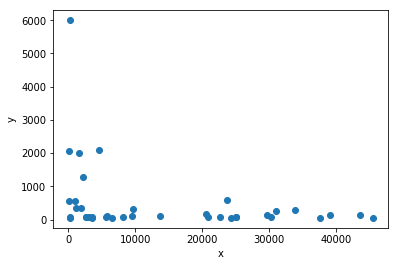

In [140]:
plt.scatter(fundVisit['alexaRank'], fundVisit['funding'])
#plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [141]:
fundSize = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'funding', 'employeesCount']]
fundSize = fundSize.dropna()
len(fundSize)

53

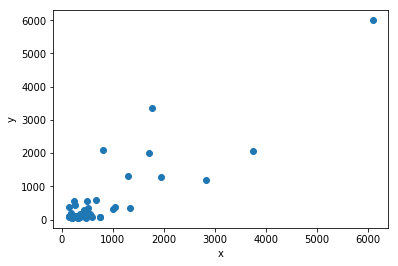

In [142]:
plt.scatter(fundSize['employeesCount'], fundSize['funding'])
#plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [143]:
fundGrowth = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'funding', 'growthScore']]
fundGrowth = fundGrowth.dropna()
len(fundGrowth)

27

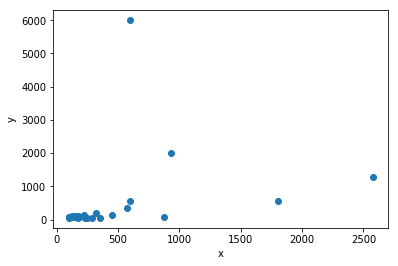

In [144]:
plt.scatter(fundGrowth['growthScore'], fundGrowth['funding'])
#plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [145]:
fundDA = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'funding', 'domainAuthority']]
fundDA = fundDA.dropna()
len(fundDA)

33

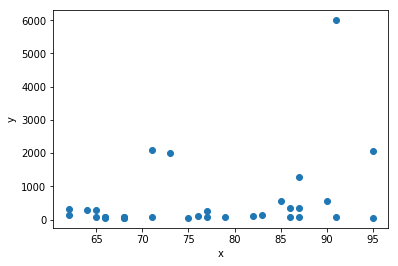

In [159]:
plt.scatter(fundDA['domainAuthority'], fundDA['funding'])
#plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

###### Analyse de chaque catégorie par batch

In [ ]:
# faire aussi fund par batch. Par année et/ou par saison. Quelle année la meilleure ? Quelle promo ? Quelle saison ?

In [223]:
mergedRankings.batch.unique()

array(['W09', 'W14', 'S12', 'S07', 'S13', 'S09', 'W16', 'W13', 'S05',
       'S14', 'W08', 'W12', 'S10', 'S11', 'W10', 'S16', 'W15', 'W18',
       'S18', 'W11', 'W06', 'S15', 'W17', 'S17', 'S06', 'W07', 'W19',
       'S08'], dtype=object)

In [234]:
promo_list = funding.batch.unique().tolist()

In [232]:
funding = funding.astype({'funding': 'float64'})

In [244]:
for promo in promo_list:
    print('La capitalisation moyenne pour une startup de la promo ' + promo + ' est de :')
    print(funding[funding.batch == promo].funding.mean())

La capitalisation moyenne pour une startup de la promo W09 est de :
6000.3
La capitalisation moyenne pour une startup de la promo W14 est de :
637.5875000000001
La capitalisation moyenne pour une startup de la promo S12 est de :
382.1625000000001
La capitalisation moyenne pour une startup de la promo S07 est de :
1059.0
La capitalisation moyenne pour une startup de la promo S13 est de :
609.4
La capitalisation moyenne pour une startup de la promo S09 est de :
472.09999999999997
La capitalisation moyenne pour une startup de la promo W16 est de :
374.075
La capitalisation moyenne pour une startup de la promo W13 est de :
249.82000000000002
La capitalisation moyenne pour une startup de la promo S05 est de :
550.1
La capitalisation moyenne pour une startup de la promo S14 est de :
154.2
La capitalisation moyenne pour une startup de la promo W08 est de :
390.3
La capitalisation moyenne pour une startup de la promo W12 est de :
164.3125
La capitalisation moyenne pour une startup de la promo 

###### Stats descriptives par catégorie

In [ ]:
### Idées en vrac : matrices de corrélation (voir page que j'ai sur mon google chrome)

###### Employees and RS

In [151]:
sizeTwitter = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'employeesCount', 'twitterFollowers']]
sizeTwitter = sizeTwitter.dropna()
len(sizeTwitter)

33

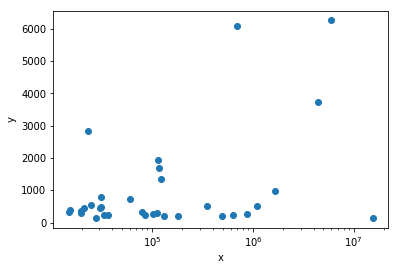

In [156]:
plt.scatter(sizeTwitter['twitterFollowers'], sizeTwitter['employeesCount'])
plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [161]:
sizeTweets = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'employeesCount', 'tweetCount']]
sizeTweets = sizeTweets.dropna()
len(sizeTweets)

38

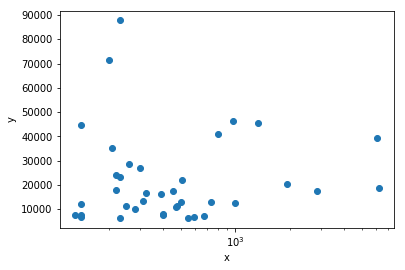

In [165]:
plt.scatter(sizeTweets['employeesCount'], sizeTweets['tweetCount'])
plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [167]:
sizeFacebook = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'employeesCount', 'facebookLikes']]
sizeFacebook = sizeFacebook.dropna()
len(sizeFacebook)

33

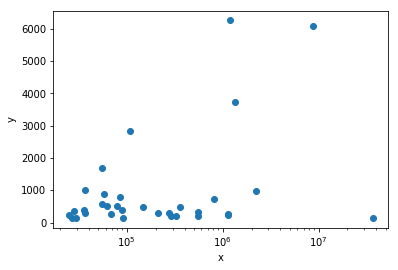

In [171]:
plt.scatter(sizeFacebook['facebookLikes'], sizeFacebook['employeesCount'])
plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [172]:
sizeLinkedin = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'employeesCount', 'linkedinFollowers']]
sizeLinkedin = sizeLinkedin.dropna()
len(sizeLinkedin)

22

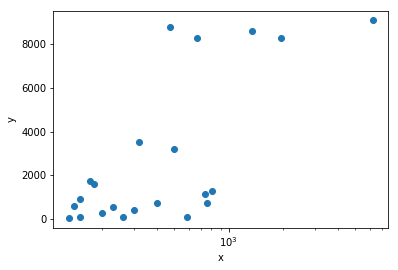

In [176]:
plt.scatter(sizeLinkedin['employeesCount'], sizeLinkedin['linkedinFollowers'])
plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [177]:
sizeVisit = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'employeesCount', 'alexaRank']]
sizeVisit = sizeVisit.dropna()
len(sizeVisit)

44

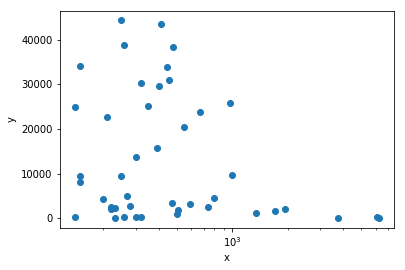

In [184]:
plt.scatter(sizeVisit['employeesCount'], sizeVisit['alexaRank'])
plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

###### Growth Score and RS

In [185]:
growthTwitter = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'growthScore', 'twitterFollowers']]
growthTwitter = growthTwitter.dropna()
len(growthTwitter)

21

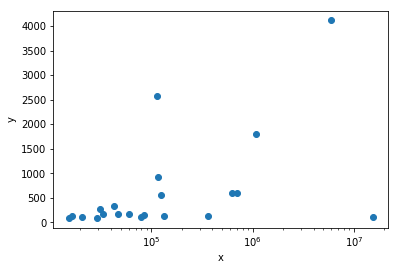

In [190]:
plt.scatter(growthTwitter['twitterFollowers'], growthTwitter['growthScore'])
plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [191]:
growthTweets = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'growthScore', 'tweetCount']]
growthTweets = growthTweets.dropna()
len(growthTweets)

21

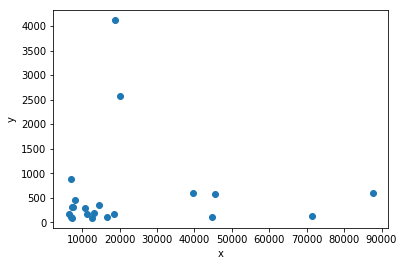

In [197]:
plt.scatter(growthTweets['tweetCount'], growthTweets['growthScore'])
#plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [198]:
growthFacebook = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'growthScore', 'facebookLikes']]
growthFacebook = growthFacebook.dropna()
len(growthFacebook)

22

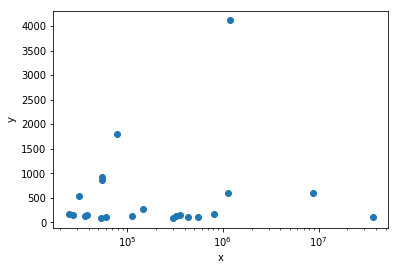

In [206]:
plt.scatter(growthFacebook['facebookLikes'], growthFacebook['growthScore'])
plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [207]:
growthLinkedin = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'growthScore', 'linkedinFollowers']]
growthLinkedin = growthLinkedin.dropna()
len(growthLinkedin)

21

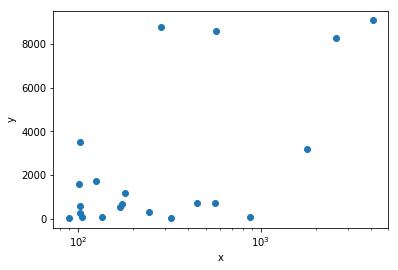

In [214]:
plt.scatter(growthLinkedin['growthScore'], growthLinkedin['linkedinFollowers'])
plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [216]:
growthVisit = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'growthScore', 'alexaRank']]
growthVisit = growthVisit.dropna()
len(growthVisit)

29

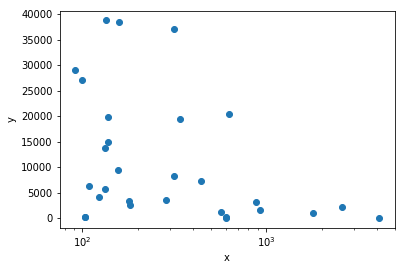

In [222]:
plt.scatter(growthVisit['growthScore'], growthVisit['alexaRank'])
plt.xscale("log")

#plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()

In [87]:
growthHunt = mergedRankings[['noms', 'batch', 'categories', 'descriptions', 'growthScore', 'huntVotes']]
growthHunt = growthHunt.dropna()
len(growthHunt)

6